In [227]:
__author__ = 'Nikola Djuza RA6-2012'

%matplotlib inline
import numpy as np
import collections
import sys
import cv2
import scipy as sc
import matplotlib.pyplot as plt

# pylab.rcParams['figure.figsize'] = 16, 12

from sklearn.cluster import KMeans
from midiutil.MidiFile import MIDIFile

In [228]:
def display_image(image, color = False):
    if color:
        plt.imshow(image)
    else:
        plt.imshow(image, 'gray')

def load_and_prepare_image(image_path):
    image = cv2.imread(image_path)
    ret, image_bin = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

    return image_bin

In [229]:
def create_fiveline(image):
    edges = cv2.Canny(image, 50, 150, apertureSize=3)

    ys = list()
    minLineLength = 1
    maxLineGap = 10

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 70, minLineLength, maxLineGap)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(image, (x1,y1), (x2,y2), (0, 255, 0), 2)
            if (abs(y1 - y2 < 4)):
                innerlist = list()
                innerlist.append((y1 + y2) / 2)
                ys.append(innerlist)
    
    cv2.imwrite('images/houghlines.jpg', image)
    display_image(image)

    kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
    kmeans.fit(np.asarray(ys))

    fiveline = list()
    for innerlist in kmeans.cluster_centers_:
        fiveline.append(innerlist[0])

    fiveline.sort()
    print fiveline
    return fiveline

In [230]:
def create_checks(fiveline):
    checks = list()
    dist = abs(fiveline[1] - fiveline[0])
    
    for line in fiveline:
        checks.append(int(line - (dist / 4)))
        checks.append(int(line + (dist / 4)))

    checks.sort()
    checks.reverse()
    return checks

[41.068965517241388, 60.951219512195109, 80.872340425531917, 101.28571428571428, 121.5]


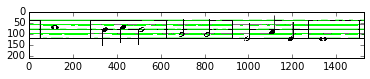

In [231]:
img = load_and_prepare_image('images/test.png')

height, width = img.shape[:2]

fiveline = create_fiveline(img)

checks = create_checks(fiveline)

In [232]:
!ipython nbconvert --to script note-play.ipynb

[NbConvertApp] Converting notebook note-play.ipynb to script
[NbConvertApp] Writing 2038 bytes to note-play.py
